In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data - Fixed file path with proper drive letter and raw string
file_path = r'C:\Users\craig\caseStudy_HM\Assignment_Files\Lead Fraud Analyst _Case_Assessment_Data.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print(f"❌ File not found at: {file_path}")
    print("Please check if the file exists at this location")
except Exception as e:
    print(f"❌ Error loading data: {e}")


✅ Data loaded successfully!
Dataset shape: (46258, 24)
Columns: ['APPLICATION_ID', 'APPLICATION_SUBMITTED_DATE', 'OFFER_SHOWN_DATE', 'OFFER_SELECTED_DATE', 'ORIGINATION_DATE', 'FRAUD_STATUS', 'FRAUD_MODEL_RESULT', 'FRAUD_MODEL_REASONS', 'PHONE_NUMBER', 'EMAIL', 'IP_ADDRESS', 'DEVICE_NETWORK', 'DNB_RUN', 'BEHAVIOR_CHECK_SCORE', 'BEHAVIOR_CHECK_REASON', 'DEVICE_CHECK_SCORE', 'DEVICE_CHECK_REASON', 'DIT_FLAG', 'DIT_DECISION', 'DIT_DETAILS', 'KOUNT_FLAG', 'KOUNT_AUTO', 'KOUNT_AUTO_REASON', 'KOUNT_VARIABLE']

First 5 rows:
                                      APPLICATION_ID  \
0  c87a5993bb57086c244d8346203467ff4da80a3a2312ff...   
1  daf6f85e2d6796c306dfcc3b36a4cbb75c6af00d75c50b...   
2  c300f07794896fdc8c2f02267431962d10258573a1c2c7...   
3  1f8e911900ccf06d4fbc64371db1baf7f169d225816b62...   
4  2285525a3f7bea1fb4cd39210a07610526f6b826052f48...   

  APPLICATION_SUBMITTED_DATE OFFER_SHOWN_DATE OFFER_SELECTED_DATE  \
0                 2025-01-26              NaN                 NaN   
1

In [38]:
# Data Cleaning and Preprocessing

# Display data types and non-null counts
print("--- Data Types and Non-Null Counts ---")
df.info()

# Display missing value counts
print("\n--- Missing Value Counts ---")
print(df.isnull().sum())

# Display summary statistics for all columns
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

--- Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46258 entries, 0 to 46257
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   APPLICATION_ID              46258 non-null  object 
 1   APPLICATION_SUBMITTED_DATE  46258 non-null  object 
 2   OFFER_SHOWN_DATE            6890 non-null   object 
 3   OFFER_SELECTED_DATE         5212 non-null   object 
 4   ORIGINATION_DATE            2170 non-null   object 
 5   FRAUD_STATUS                46258 non-null  object 
 6   FRAUD_MODEL_RESULT          44045 non-null  object 
 7   FRAUD_MODEL_REASONS         19698 non-null  object 
 8   PHONE_NUMBER                46258 non-null  object 
 9   EMAIL                       46258 non-null  object 
 10  IP_ADDRESS                  46258 non-null  object 
 11  DEVICE_NETWORK              34373 non-null  object 
 12  DNB_RUN                     44047 non-null  objec

In [39]:
# Clean column names
df.columns = df.columns.str.strip().str.upper()

# Print columns to debug
print("--- Cleaned and Uppercased Column Names ---")
print(df.columns)

# Convert 'APPLICATION_SUBMITTED_DATE' to datetime
df['APPLICATION_SUBMITTED_DATE'] = pd.to_datetime(df['APPLICATION_SUBMITTED_DATE'])

# Verify the conversion
print("\n--- Data Types after Conversion ---")
df.info()

--- Cleaned and Uppercased Column Names ---
Index(['APPLICATION_ID', 'APPLICATION_SUBMITTED_DATE', 'OFFER_SHOWN_DATE',
       'OFFER_SELECTED_DATE', 'ORIGINATION_DATE', 'FRAUD_STATUS',
       'FRAUD_MODEL_RESULT', 'FRAUD_MODEL_REASONS', 'PHONE_NUMBER', 'EMAIL',
       'IP_ADDRESS', 'DEVICE_NETWORK', 'DNB_RUN', 'BEHAVIOR_CHECK_SCORE',
       'BEHAVIOR_CHECK_REASON', 'DEVICE_CHECK_SCORE', 'DEVICE_CHECK_REASON',
       'DIT_FLAG', 'DIT_DECISION', 'DIT_DETAILS', 'KOUNT_FLAG', 'KOUNT_AUTO',
       'KOUNT_AUTO_REASON', 'KOUNT_VARIABLE'],
      dtype='object')

--- Data Types after Conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46258 entries, 0 to 46257
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   APPLICATION_ID              46258 non-null  object        
 1   APPLICATION_SUBMITTED_DATE  46258 non-null  datetime64[ns]
 2   OFFER_SHOWN_DATE            6890 

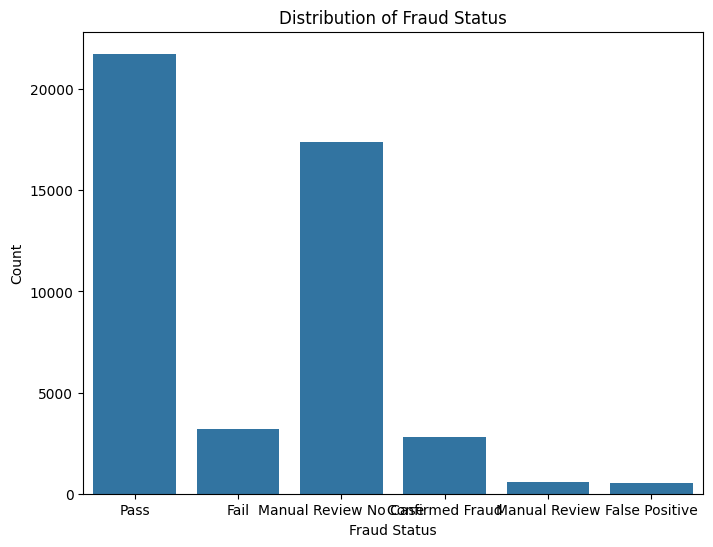

--- Fraud Status Value Counts ---
FRAUD_STATUS
Pass                     21751
Manual Review No Case    17387
Fail                      3201
Confirmed Fraud           2805
Manual Review              601
False Positive             513
Name: count, dtype: int64


In [40]:
# Visualize the distribution of FRAUD_STATUS
plt.figure(figsize=(8, 6))
sns.countplot(x='FRAUD_STATUS', data=df)
plt.title('Distribution of Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

# Display the value counts
print("--- Fraud Status Value Counts ---")
print(df['FRAUD_STATUS'].value_counts())

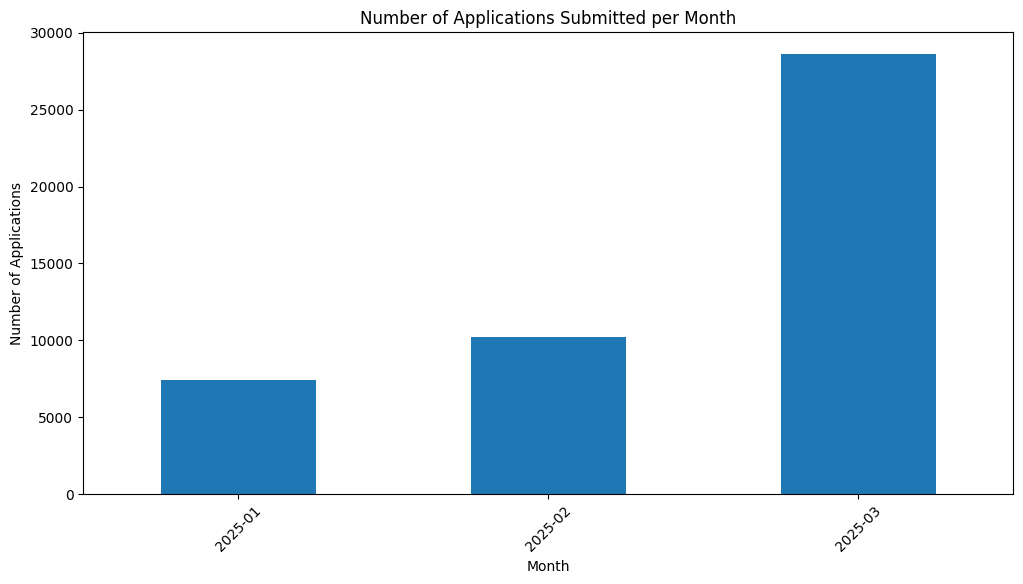

In [41]:
# Analyze applications over time
df['application_month'] = df['APPLICATION_SUBMITTED_DATE'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df['application_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Applications Submitted per Month')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.show()

## Model Performance Analysis: Recall and Precision

This section analyzes the fraud model's performance using two key metrics: **Recall** and **Precision**.

### Definitions

- **Recall (Sensitivity or True Positive Rate):** This metric measures the model's ability to identify all actual fraud cases. It answers the question: "Of all the applications that were truly fraudulent, what percentage did our model catch?"
  - `Recall = True Positives / (True Positives + False Negatives)`

- **Precision:** This metric measures the accuracy of the model's positive predictions. It answers the question: "Of all the applications that the model flagged as potential fraud, what percentage were actually fraudulent?"
  - `Precision = True Positives / (True Positives + False Positives)`

### How Metrics are Calculated from the Data

- **True Positives (TP):** The model flagged an application for review (or rejected it), and it was later confirmed to be fraud.
  - `FRAUD_MODEL_RESULT` is in `['fraud_review', 'fraud_review_no_case', 'fraud_decline', 'fraud_reject']`
  - `FRAUD_STATUS` is `'Confirmed Fraud'`

- **False Positives (FP):** The model flagged an application for review, but it was later determined to be a false positive.
  - `FRAUD_MODEL_RESULT` is in `['fraud_review', 'fraud_review_no_case', 'fraud_decline', 'fraud_reject']`
  - `FRAUD_STATUS` is `'False Positive'`

- **False Negatives (FN):** The model passed an application, but it was actually fraudulent. In this dataset, we identify these as cases where the model passed the application, but it was later identified as fraud.
  - `FRAUD_MODEL_RESULT` is `'fraud_pass'`
  - `FRAUD_STATUS` is `'Confirmed Fraud'`

In [42]:
# Calculate Model Recall and Precision

# Define the conditions for True Positives, False Positives, and False Negatives
model_flagged = ['fraud_review', 'fraud_review_no_case', 'fraud_decline', 'fraud_reject']

# True Positives (TP): Model flagged and it was confirmed fraud
tp = df[(df['FRAUD_MODEL_RESULT'].isin(model_flagged)) & (df['FRAUD_STATUS'] == 'Confirmed Fraud')].shape[0]

# False Positives (FP): Model flagged and it was a false positive
fp = df[(df['FRAUD_MODEL_RESULT'].isin(model_flagged)) & (df['FRAUD_STATUS'] == 'False Positive')].shape[0]

# False Negatives (FN): Model passed and it was confirmed fraud
fn = df[(df['FRAUD_MODEL_RESULT'] == 'fraud_pass') & (df['FRAUD_STATUS'] == 'Confirmed Fraud')].shape[0]

# Calculate Recall and Precision
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
precision = tp / (tp + fp) if (tp + fp) > 0 else 0

# Print the results
print("--- Model Performance Metrics ---")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"\nModel Recall: {recall:.2%}")
print(f"Model Precision: {precision:.2%}")

--- Model Performance Metrics ---
True Positives (TP): 124
False Positives (FP): 497
False Negatives (FN): 2681

Model Recall: 4.42%
Model Precision: 19.97%


### Analysis of Model Performance

The calculated metrics reveal significant areas for improvement in the fraud model:

- **Low Recall (4.42%):** This is a major concern. It indicates that the model is failing to identify over 95% of the actual fraud cases. A low recall means that a large number of fraudulent applications are being incorrectly classified as legitimate, which could lead to significant financial losses.

- **Low Precision (19.97%):** This means that out of all the applications flagged by the model, only about 20% are actually confirmed to be fraudulent. The remaining 80% are false positives, which can lead to unnecessary manual reviews and a poor customer experience for legitimate applicants.

### Initial Impressions

The current model is not effective at distinguishing between fraudulent and legitimate applications. The high number of false negatives (2,681) compared to true positives (124) is particularly alarming. This suggests that the model's rules and features are not sensitive enough to capture the majority of fraudulent activities.

The high number of false positives also indicates that the model is too broad in its flagging criteria, leading to a high volume of manual reviews that are ultimately unproductive. This not only wastes resources but also introduces friction for good customers.

Overall, the model needs a significant overhaul to improve its ability to detect fraud while minimizing the impact on legitimate users.

## Answering the Assignment Questions

### Question 1: What trends do you see in the data, both in terms of cases of confirmed fraud as well as false positives?

To answer this question, we will analyze the trends of 'Confirmed Fraud' and 'False Positive' cases over time. The following chart visualizes the number of cases for each category per month.

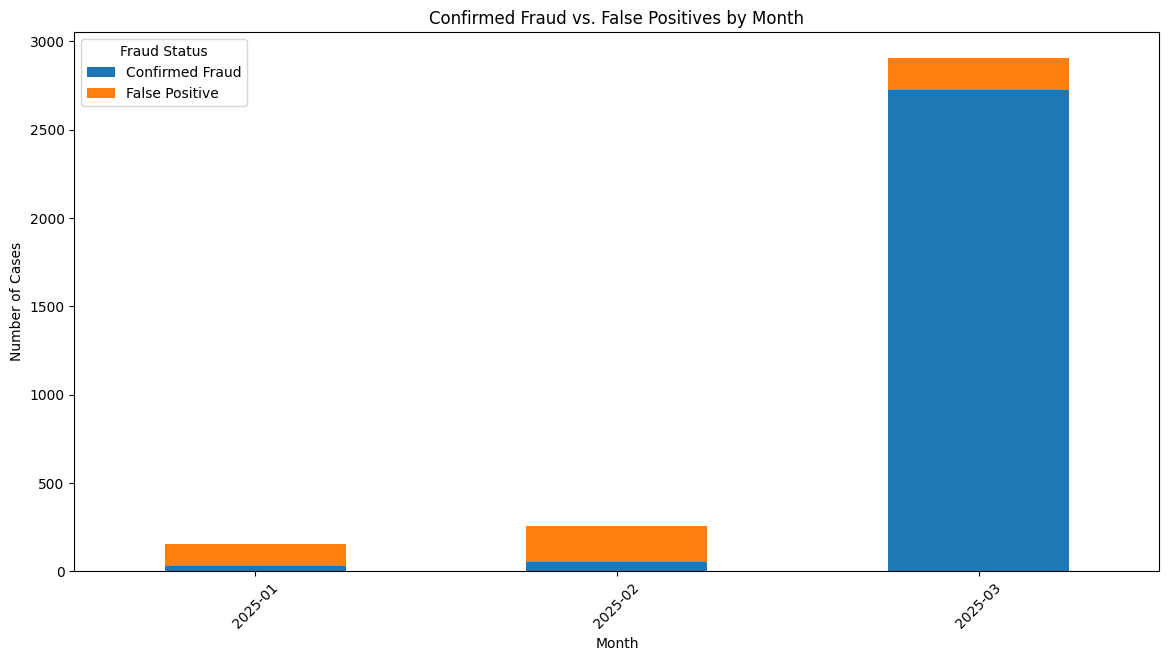

--- Confirmed Fraud vs. False Positives by Month ---
FRAUD_STATUS       Confirmed Fraud  False Positive
application_month                                 
2025-01                         30             124
2025-02                         51             207
2025-03                       2724             182


In [43]:
# Analyze trends of Confirmed Fraud and False Positives over time
fraud_trends = df[df['FRAUD_STATUS'].isin(['Confirmed Fraud', 'False Positive'])]

# Create a pivot table to count cases per month
fraud_pivot = pd.crosstab(fraud_trends['application_month'], fraud_trends['FRAUD_STATUS'])

# Plot the trends
fraud_pivot.plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Confirmed Fraud vs. False Positives by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Fraud Status')
plt.show()

# Display the pivot table
print("--- Confirmed Fraud vs. False Positives by Month ---")
print(fraud_pivot)

### Answer to Question 1: Trends in Confirmed Fraud and False Positives

#### Key Observations:

1.  **Massive Spike in Confirmed Fraud in March:** The most striking trend is the dramatic increase in "Confirmed Fraud" cases in March 2025. The number of confirmed fraud cases jumped from 51 in February to 2,724 in March. This indicates a significant fraud attack or a new, widespread fraud vector that emerged during that month.

2.  **Steady Increase in False Positives:** The number of "False Positive" cases shows a steady increase from January to February and then a slight decrease in March. However, the number of false positives is consistently high, outnumbering the confirmed fraud cases in January and February.

#### Initial Impressions:

-   **Reactive, Not Proactive, Fraud Detection:** The sudden spike in confirmed fraud suggests that the current fraud detection system is not proactively identifying new fraud patterns. It's likely that the system was overwhelmed by a new type of attack in March, and the "Confirmed Fraud" cases are a result of manual review after the fact.

-   **Inefficient Manual Review Process:** The high number of false positives indicates that the manual review process is likely inefficient. A large number of legitimate applications are being flagged for review, which can lead to a poor customer experience and a waste of resources.

-   **Model's Inability to Adapt:** The fraud model does not seem to be adapting to new fraud trends. The fact that a massive fraud attack could occur in March without being effectively mitigated by the model suggests that the model's rules and features are static and not learning from new data.

In summary, the data points to a fraud system that is struggling to keep up with evolving fraud tactics. The system is both missing a significant amount of fraud and incorrectly flagging a large number of legitimate applications. This creates a dual problem of financial losses from fraud and operational inefficiencies from a high volume of manual reviews.

### Question 2: How do the fraud models and data explain the trends?

To understand how the model's performance explains the observed trends, we need to look at two key areas:

1.  **`FRAUD_MODEL_RESULT` vs. `FRAUD_STATUS`:** How do the initial model outcomes correlate with the final, manually reviewed statuses?
2.  **`FRAUD_MODEL_REASONS`:** What specific rules are triggering the model's decisions? Are these rules effective?

This analysis will reveal why the model has such low recall and precision, and why it failed to prevent the spike in fraud in March.

--- FRAUD_MODEL_RESULT vs. FRAUD_STATUS ---
FRAUD_STATUS          Confirmed Fraud  Fail  False Positive  Manual Review  \
FRAUD_MODEL_RESULT                                                           
fraud_decline                       0    56               0              0   
fraud_pass                       2681     0              16              3   
fraud_reject                        5  2982               0              0   
fraud_review                      114     0             486            596   
fraud_review_no_case                5   162              11              2   

FRAUD_STATUS          Manual Review No Case   Pass  
FRAUD_MODEL_RESULT                                  
fraud_decline                             0      0  
fraud_pass                                0  21548  
fraud_reject                              0      0  
fraud_review                              0     28  
fraud_review_no_case                  15349      1  


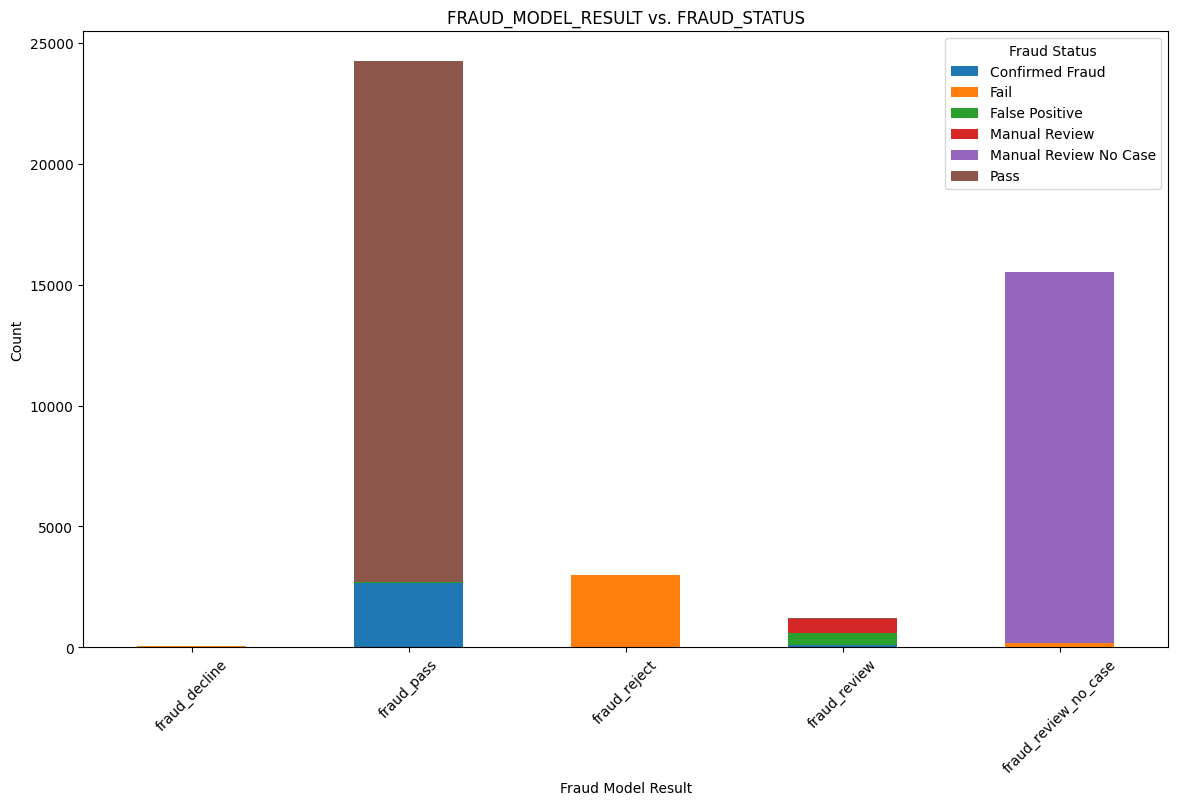

In [44]:
# Analyze the relationship between FRAUD_MODEL_RESULT and FRAUD_STATUS
model_status_crosstab = pd.crosstab(df['FRAUD_MODEL_RESULT'], df['FRAUD_STATUS'])

# Display the crosstab
print("--- FRAUD_MODEL_RESULT vs. FRAUD_STATUS ---")
print(model_status_crosstab)

# Plot the crosstab
model_status_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('FRAUD_MODEL_RESULT vs. FRAUD_STATUS')
plt.xlabel('Fraud Model Result')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud Status')
plt.show()

### Answer to Question 2: How the Fraud Model Explains the Trends

The crosstab between `FRAUD_MODEL_RESULT` and `FRAUD_STATUS` provides a clear picture of why the model is performing poorly and how it explains the trends we've observed.

#### Key Insights:

1.  **`fraud_pass` is the Source of Most Missed Fraud (Low Recall):**
    -   The model result `fraud_pass` has **2,681** cases of "Confirmed Fraud". These are the **false negatives**.
    -   This is the primary reason for the model's extremely low recall. The model is incorrectly giving a "pass" to a vast majority of fraudulent applications, which then proceed without further review until they are later identified as fraud.
    -   This directly explains the spike in "Confirmed Fraud" in March. A large number of fraudulent applications were likely passed by the model and only later identified as fraud.

2.  **`fraud_review` is the Source of Most False Positives (Low Precision):**
    -   The model result `fraud_review` has **486** cases of "False Positive" and only **114** cases of "Confirmed Fraud".
    -   This means that when an application is sent for manual review, it is more than four times as likely to be a false positive than a true case of fraud.
    -   This explains the model's low precision and the high operational cost of the manual review process.

3.  **`fraud_reject` and `fraud_decline` are Ineffective:**
    -   The `fraud_reject` and `fraud_decline` statuses, which should be catching the most obvious fraud cases, are catching very few. `fraud_reject` only identified 5 confirmed fraud cases, and `fraud_decline` identified none.
    -   This suggests that the rules for outright rejecting or declining applications are not well-calibrated and are missing most of the fraud.

#### Initial Thoughts on the Fraud Model and Policy:

-   **The Model is Overly Reliant on Manual Review:** The model seems to be designed to send a large number of cases for manual review rather than making a definitive decision (pass or reject). This is a common strategy when there is low confidence in the model's automated decisions, but it is inefficient and not scalable.

-   **The "Pass" Criteria is Too Lenient:** The fact that so many fraudulent applications are being passed indicates that the criteria for a "pass" are too lenient. The model is not effectively using the available data (DNB, DIT, Kount) to identify high-risk applications.

-   **The Ruleset is Not Capturing Key Fraud Signals:** The `FRAUD_MODEL_REASONS` (which we will analyze next) are likely not capturing the key signals of the new fraud trends, especially the one that hit in March.

In conclusion, the model's structure and rules are the primary cause of the observed trends. It is failing to catch most of the fraud, and it is creating a high volume of unnecessary work for the manual review team. The policy is not effectively balancing risk and customer experience.